In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### This notebook shows how to create figures from ProteoBench intermediate files.
#### As an example, we will plot the intensity vs. the logFC, similar to Fig3d in the publication of the benchmark data for Ion Quantification (Van Puyvelde et al, 2022)

In [2]:
# read in ProteoBench intermediate file
intermediate_file = pd.read_csv("../../test/data/intermediate_files/result_performance_MaxQuant_20241216_120952.csv")

# take mean of log intensity mean a and log intensity mean b
intermediate_file["logIntensityMean"] = (
    intermediate_file["log_Intensity_mean_A"] + intermediate_file["log_Intensity_mean_B"]
) / 2

intermediate_file

,precursor ion,log_Intensity_mean_A,log_Intensity_mean_B,log_Intensity_std_A,log_Intensity_std_B,Intensity_mean_A,Intensity_mean_B,Intensity_std_A,Intensity_std_B,CV_A,...,LFQ_Orbitrap_DDA_Condition_B_Sample_Alpha_03,nr_observed,YEAST,ECOLI,HUMAN,unique,species,log2_expectedRatio,epsilon,logIntensityMean
0,AAAAAAALQAK|Z=2,27.235489,27.028167,0.188168,0.221037,1.589267e+08,1.379333e+08,2.116316e+07,2.096537e+07,0.133163,...,158970000.0,6,False,False,True,1,HUMAN,0.0,0.207322,27.131828
1,AAAAAWEEPSSGNGTAR|Z=2,25.450380,25.211355,0.134862,0.326423,4.598067e+07,3.951600e+07,4.208833e+06,8.918456e+06,0.091535,...,48838000.0,6,False,False,True,1,HUMAN,0.0,0.239024,25.330867
2,AAAAPGASPSPGGDAAWSEAGPGPRPLAR|Z=3,24.349503,23.859391,0.188999,0.455512,2.150133e+07,1.575067e+07,2.900070e+06,5.203406e+06,0.134879,...,21631000.0,6,False,False,True,1,HUMAN,0.0,0.490113,24.104447
3,AAAASAAEAGIATTGTEDSDDALLK|Z=2,23.921956,23.952467,0.196467,0.513949,1.599467e+07,1.694700e+07,2.254605e+06,6.178895e+06,0.140960,...,23776000.0,6,False,False,True,1,HUMAN,0.0,-0.030512,23.937211
4,AAAASAAEAGIATTGTEDSDDALLK|Z=3,25.214791,25.327043,0.105317,0.141835,3.899300e+07,4.222767e+07,2.843983e+06,4.143261e+06,0.072936,...,42136000.0,5,False,False,True,1,HUMAN,0.0,-0.112253,25.270917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,[Acetyl]-TTSASSHLNK|Z=2,25.104813,25.259046,0.206576,0.073889,3.633633e+07,4.018050e+07,5.385587e+06,2.056974e+06,0.148215,...,38726000.0,5,False,False,True,1,HUMAN,0.0,-0.154233,25.181930
32888,[Acetyl]-TTSGALFPSLVPGSR|Z=2,25.857205,25.708186,0.044991,0.172960,6.079950e+07,5.508833e+07,1.895753e+06,6.808601e+06,0.031180,...,62927000.0,5,False,False,True,1,HUMAN,0.0,0.149019,25.782696
32889,[Acetyl]-TTYLEFIQQNEER|Z=2,23.308415,22.840715,NaN,0.378718,1.038800e+07,7.678867e+06,NaN,1.887151e+06,NaN,...,8151900.0,4,False,False,True,1,HUMAN,0.0,0.467700,23.074565
32890,[Acetyl]-VEADRPGK|Z=2,27.595980,27.729553,NaN,0.030665,2.028700e+08,2.225750e+08,NaN,4.730544e+06,NaN,...,219230000.0,3,False,False,True,1,HUMAN,0.0,-0.133573,27.662767


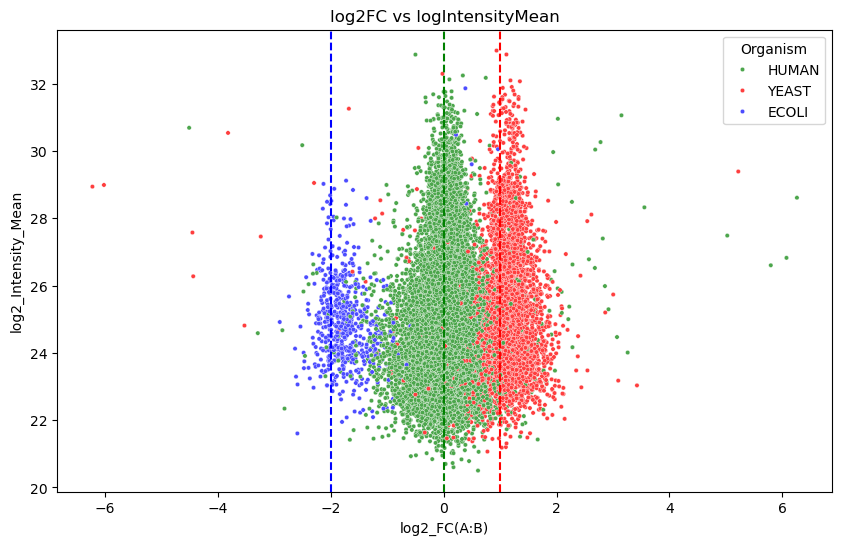

In [3]:
# plot FC vs Intensity per species
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=intermediate_file,
    y="logIntensityMean",
    x="log2_A_vs_B",
    hue="species",
    palette=dict(YEAST="#FE3E3E", HUMAN="#4CA64C", ECOLI="#4C4CFF"),
    s=10
)
plt.title("log2FC vs logIntensityMean")
plt.xlabel("log2_FC(A:B)")
plt.ylabel("log2_Intensity_Mean")
plt.legend(title="Organism")

# add verical lines at log2FC = 0 (human), log2FC = 1 (Yeast), logFC = -2 (Ecoli)
plt.axvline(x=0, color="green", linestyle="--", label="log2FC = 0")
plt.axvline(x=1, color="red", linestyle="--", label="log2FC = 1")
plt.axvline(x=-2, color="blue", linestyle="--", label="log2FC = -2")